In [1]:
# Importing all the required dependencies
import os
import pprint
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from math import radians, cos, sin, asin, sqrt
import pydot
import seaborn as sns
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import json

Using TensorFlow backend.


In [2]:
# Reading the sampled data containing 22 features, 10152 rows and 11 classes
sampled_data = pd.read_csv('../dataset/dataset-22-features/sampled-dataset.csv')
sampled_df=pd.DataFrame(sampled_data)

In [3]:
# Changing class names to numerical values
class_name =sampled_df['class'].unique()
le = preprocessing.LabelEncoder()
le.fit(sampled_df['class'])
sampled_df['class']=le.transform(sampled_df['class'])
class_id = sampled_df['class'].unique()

In [4]:
# Mapping class names and ids(numerical values)
class_dict={}
for i in range(0,len(class_name)):
    class_dict[int(class_id[i])]=class_name[i]

<module 'seaborn' from '/home/abdsamadh/.virtualenvs/dlworkspace/lib/python3.6/site-packages/seaborn/__init__.py'>

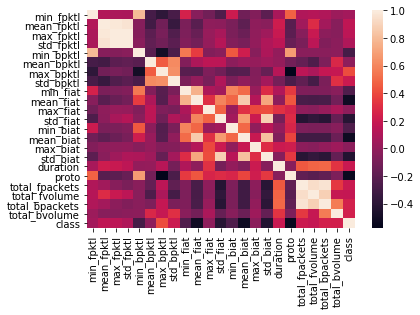

In [5]:
# Correlation Matrix
corr = sampled_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.set(rc={'figure.figsize':(10,10)})
sns

In [6]:
# Using only 3 features out of 22 for training
sampled_df=sampled_df[['mean_biat','std_fiat','mean_fiat','class']]
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10152 entries, 0 to 10151
Data columns (total 4 columns):
mean_biat    10152 non-null int64
std_fiat     10152 non-null int64
mean_fiat    10152 non-null int64
class        10152 non-null int64
dtypes: int64(4)
memory usage: 317.4 KB


<module 'seaborn' from '/home/abdsamadh/.virtualenvs/dlworkspace/lib/python3.6/site-packages/seaborn/__init__.py'>

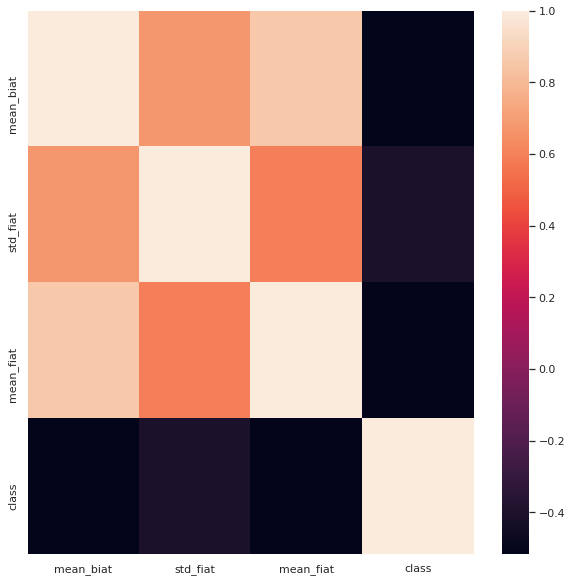

In [7]:
# Correlation Matrix
corr = sampled_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.set(rc={'figure.figsize':(10,10)})
sns

In [8]:
# Dividing into training and testing sets 80:20
X = sampled_df.drop(['class'],axis=1)
y = np.ravel(sampled_df['class'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
# Scaling the inputs
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Defining the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(3,)))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(11,activation='softmax'))

In [11]:
# Training the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train,epochs=100, batch_size=32, verbose=0,validation_data=(X_test,y_test))

<Figure size 432x288 with 0 Axes>

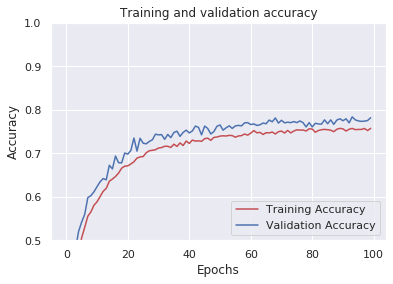

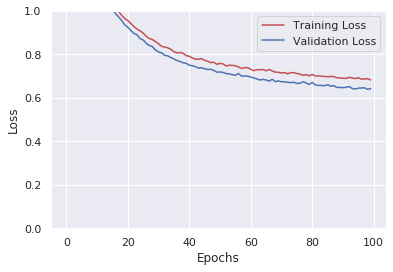

<Figure size 432x288 with 0 Axes>

In [12]:
# Plotting accuracy and loss

%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label="Training Accuracy",)
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim(0.5, 1.0)
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim(0,1)
plt.legend(loc='upper right')
plt.figure()

In [13]:
# Model prediction stats
y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_bool))
print(confusion_matrix(y_test, y_pred_bool))
print("\nMap to class id and class name: ")
print(json.dumps(class_dict, indent=4, sort_keys=True))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       198
           1       0.89      0.25      0.39        65
           2       0.57      0.57      0.57       190
           3       0.84      0.94      0.89       180
           4       0.70      0.60      0.65       196
           5       0.96      0.88      0.92       193
           6       0.99      0.94      0.97       194
           7       0.69      0.66      0.68       202
           8       0.70      0.81      0.75       197
           9       0.71      0.85      0.77       222
          10       0.92      0.95      0.93       194

    accuracy                           0.78      2031
   macro avg       0.79      0.75      0.75      2031
weighted avg       0.79      0.78      0.78      2031

[[158   0  13   9  14   1   0   0   0   3   0]
 [  5  16  12   6   4   0   0   0   0  17   5]
 [ 14   0 108   3  22   4   1   0   0  35   3]
 [  5   0   1 169   3   0   0   0   0   2   0]